# Popular Courses (per track) and Thesis Grades in 1 Year Master Students

## Importing libraries/setting up data

In [140]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy
from datetime import datetime
import itertools
from collections import Counter

def to_strptime(string):
    try:
        return datetime.strptime(string, "%Y-%m-%d")
    except Exception as e:
        print(e)

os.chdir('C:\\Users\\yeachan153\\Desktop\\Methodology-Consulting\\Project')
data = pd.read_csv('Master Dataframe.csv')
data = data[data['Description'] == 'M Psychologie']
data['Start Date'] = data['Start Date'].apply(to_strptime)

filter_14 = datetime.strptime('2014-09-01', "%Y-%m-%d")

pre_data = data[data['Start Date'] < filter_14]
post_data = data[data['Start Date'] >= filter_14]

## Analysis for Pre-2014 Students 

In [141]:
pre_filtercopy = copy.deepcopy(pre_data)
pre_groups = pre_filtercopy.groupby('Specialisation')

#### Spec Work & Organ. Psychology

In [142]:
org = pre_groups.get_group('Spec Work & Organ. Psychology')
soc = pre_groups.get_group('Spec Social Psychology')
sport = pre_groups.get_group('Track Sport & Performance Psy')
gen = pre_groups.get_group('General Psychology')    
train = pre_groups.get_group('Track Training & Development')
brain = pre_groups.get_group('Spec Brain & Cognition')    
forensic = pre_groups.get_group('Track Clinical Forensic Psych')

org_subjs = ['Masterstage A&O','Schr./Onderz./An./Pres']
soc_subjs = ['Masterstage Sociale Psych.', 'Recl.VL&Con', 'Sociale psych. v. emoties', 'TSP2: Interventies']
sport_subjs = ['Onderz. Sport & Prest.Ps.','Talent, Expertise & Creat.','Interv. Sport & Prest.Psy',
                'Verdieping Sport/Prest. Psyc', 'Masterstage Ontw. Psych.']
gen_subjs = ['Collectieve Stagebijeenk.','Praktijkstage Klin. Psy.', 'Pract. Klin.Psychodiagn.']
train_subjs = ['Ontwikk. van Trainingen', 'Trainerspracticum', 'Masterstage Sociale Psych.']
brain_subjs =['Masterstage Brein & Cognitie', 'Adv. Topics Cogn. Neurosc.', 'Psychofarmacologie']
forensic_subjs = ['Praktijkstage Klin. Psy.', 'Collectieve Stagebijeenk.', '3 casussen Psychodiagn.']

In [143]:
org_dfs = []
for each_subj in org_subjs:
    current_df = org[org[each_subj].notnull()]
    org_dfs.append(current_df)

for idx, each_df in enumerate(org_dfs):
    print(org_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[org_subjs[idx]]))

Masterstage A&O
SpearmanrResult(correlation=0.20114184500428425, pvalue=0.017999934052404184)
Schr./Onderz./An./Pres
SpearmanrResult(correlation=0.30977558665371707, pvalue=0.0003536978530675805)


Graph 'Schr./Onderz./An./Pres'

#### Spec Social Psychology

In [144]:
soc_dfs = []
for each_subj in soc_subjs:
    current_df = soc[soc[each_subj].notnull()]
    soc_dfs.append(current_df)

for idx, each_df in enumerate(soc_dfs):
    print(soc_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[soc_subjs[idx]]))

Masterstage Sociale Psych.
SpearmanrResult(correlation=0.32294201344767187, pvalue=0.0005148782446373784)
Recl.VL&Con
SpearmanrResult(correlation=0.2764269292895252, pvalue=0.009548722384633218)
Sociale psych. v. emoties
SpearmanrResult(correlation=0.16771892995893872, pvalue=0.14217012370504692)
TSP2: Interventies
SpearmanrResult(correlation=0.3211623294517422, pvalue=0.004143791839459149)


Graph 'Masterstage Sociale Psych.' & 'TSP2: Interventies'

#### Track Sport & Performance Psy

In [145]:
sport_dfs = []
for each_subj in sport_subjs:
    current_df = sport[sport[each_subj].notnull()]
    sport_dfs.append(current_df)

for idx, each_df in enumerate(sport_dfs):
    print(sport_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[sport_subjs[idx]]))

Onderz. Sport & Prest.Ps.
SpearmanrResult(correlation=0.1446459499360491, pvalue=0.3014283005002461)
Talent, Expertise & Creat.
SpearmanrResult(correlation=0.2892752923972136, pvalue=0.0356509862219421)
Interv. Sport & Prest.Psy
SpearmanrResult(correlation=nan, pvalue=nan)
Verdieping Sport/Prest. Psyc
SpearmanrResult(correlation=0.020526778880855606, pvalue=0.9040184918176442)
Masterstage Ontw. Psych.
SpearmanrResult(correlation=0.5959004436603731, pvalue=9.965593099909708e-05)


C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Graph 'Masterstage Ontw. Psych.'

#### General Psychology

In [146]:
gen_dfs = []
for each_subj in gen_subjs:
    current_df = gen[gen[each_subj].notnull()]
    gen_dfs.append(current_df)

for idx, each_df in enumerate(gen_dfs):
    print(gen_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[gen_subjs[idx]]))

Collectieve Stagebijeenk.
SpearmanrResult(correlation=nan, pvalue=nan)
Praktijkstage Klin. Psy.
SpearmanrResult(correlation=0.6586451616286672, pvalue=0.00046610751366899205)
Pract. Klin.Psychodiagn.
SpearmanrResult(correlation=0.322700099565247, pvalue=0.13314263287543915)


C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Graph 'Praktijkstage Klin. Psy.'

#### Track Training & Development

In [147]:
train_dfs = []
for each_subj in train_subjs:
    current_df = train[train[each_subj].notnull()]
    train_dfs.append(current_df)

for idx, each_df in enumerate(train_dfs):
    print(train_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[train_subjs[idx]]))

Ontwikk. van Trainingen
SpearmanrResult(correlation=0.09719107318596566, pvalue=0.5455014361305346)
Trainerspracticum
SpearmanrResult(correlation=0.07348146991026745, pvalue=0.6479741196193195)
Masterstage Sociale Psych.
SpearmanrResult(correlation=0.2856935521826434, pvalue=0.08207903797629615)


#### Spec Brain & Cognition

In [148]:
brain_dfs = []
for each_subj in brain_subjs:
    current_df = brain[brain[each_subj].notnull()]
    brain_dfs.append(current_df)

for idx, each_df in enumerate(brain_dfs):
    print(brain_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[brain_subjs[idx]]))

Masterstage Brein & Cognitie
SpearmanrResult(correlation=0.5137046819979167, pvalue=0.0061297705307848975)
Adv. Topics Cogn. Neurosc.
SpearmanrResult(correlation=0.033557802760701215, pvalue=0.9054926848221607)
Psychofarmacologie
SpearmanrResult(correlation=0.06375553826502223, pvalue=0.828575297707829)


Graph 'Masterstage Brein & Cognitie'

#### Track Clinical Forensic Psych

In [149]:
forensic_dfs = []
for each_subj in forensic_subjs:
    current_df = forensic[forensic[each_subj].notnull()]
    forensic_dfs.append(current_df)

for idx, each_df in enumerate(forensic_dfs):
    print(forensic_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[forensic_subjs[idx]]))

Praktijkstage Klin. Psy.
SpearmanrResult(correlation=0.2504527934096794, pvalue=0.2171879587527559)
Collectieve Stagebijeenk.
SpearmanrResult(correlation=nan, pvalue=nan)
3 casussen Psychodiagn.
SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Graphs to plot!

In [150]:
org = pre_groups.get_group('Spec Work & Organ. Psychology')
soc = pre_groups.get_group('Spec Social Psychology')
sport = pre_groups.get_group('Track Sport & Performance Psy')
gen = pre_groups.get_group('General Psychology')    
train = pre_groups.get_group('Track Training & Development')
brain = pre_groups.get_group('Spec Brain & Cognition')    
forensic = pre_groups.get_group('Track Clinical Forensic Psych')

org_subjs = ['Schr./Onderz./An./Pres'] # rs = 0.309, p < 0.001, n = 129
soc_subjs = ['Masterstage Sociale Psych.', 'TSP2: Interventies'] # rs = 0.322, p < 0.001, n = 112, # rs = 0.321, p = 0.0041, n = 78
sport_subjs = ['Masterstage Ontw. Psych.'] # rs = 0.595, p < 0.001, n = 37
gen_subjs = ['Praktijkstage Klin. Psy.'] # rs = 0.658, p < 0.001, n = 24
brain_subjs =['Masterstage Brein & Cognitie'] # rs = 0.513, p = 0.0061, n = 27

org_subjs.extend(soc_subjs+sport_subjs+gen_subjs+brain_subjs)
all_subjects = org_subjs

spec = [org, soc,soc,sport,gen,brain]

list_df = [org[org['Schr./Onderz./An./Pres'].notnull()],soc[soc['Masterstage Sociale Psych.'].notnull()],
               soc[soc['TSP2: Interventies'].notnull()],sport[sport['Masterstage Ontw. Psych.'].notnull()],
               gen[gen['Praktijkstage Klin. Psy.'].notnull()],brain[brain['Masterstage Brein & Cognitie'].notnull()]]

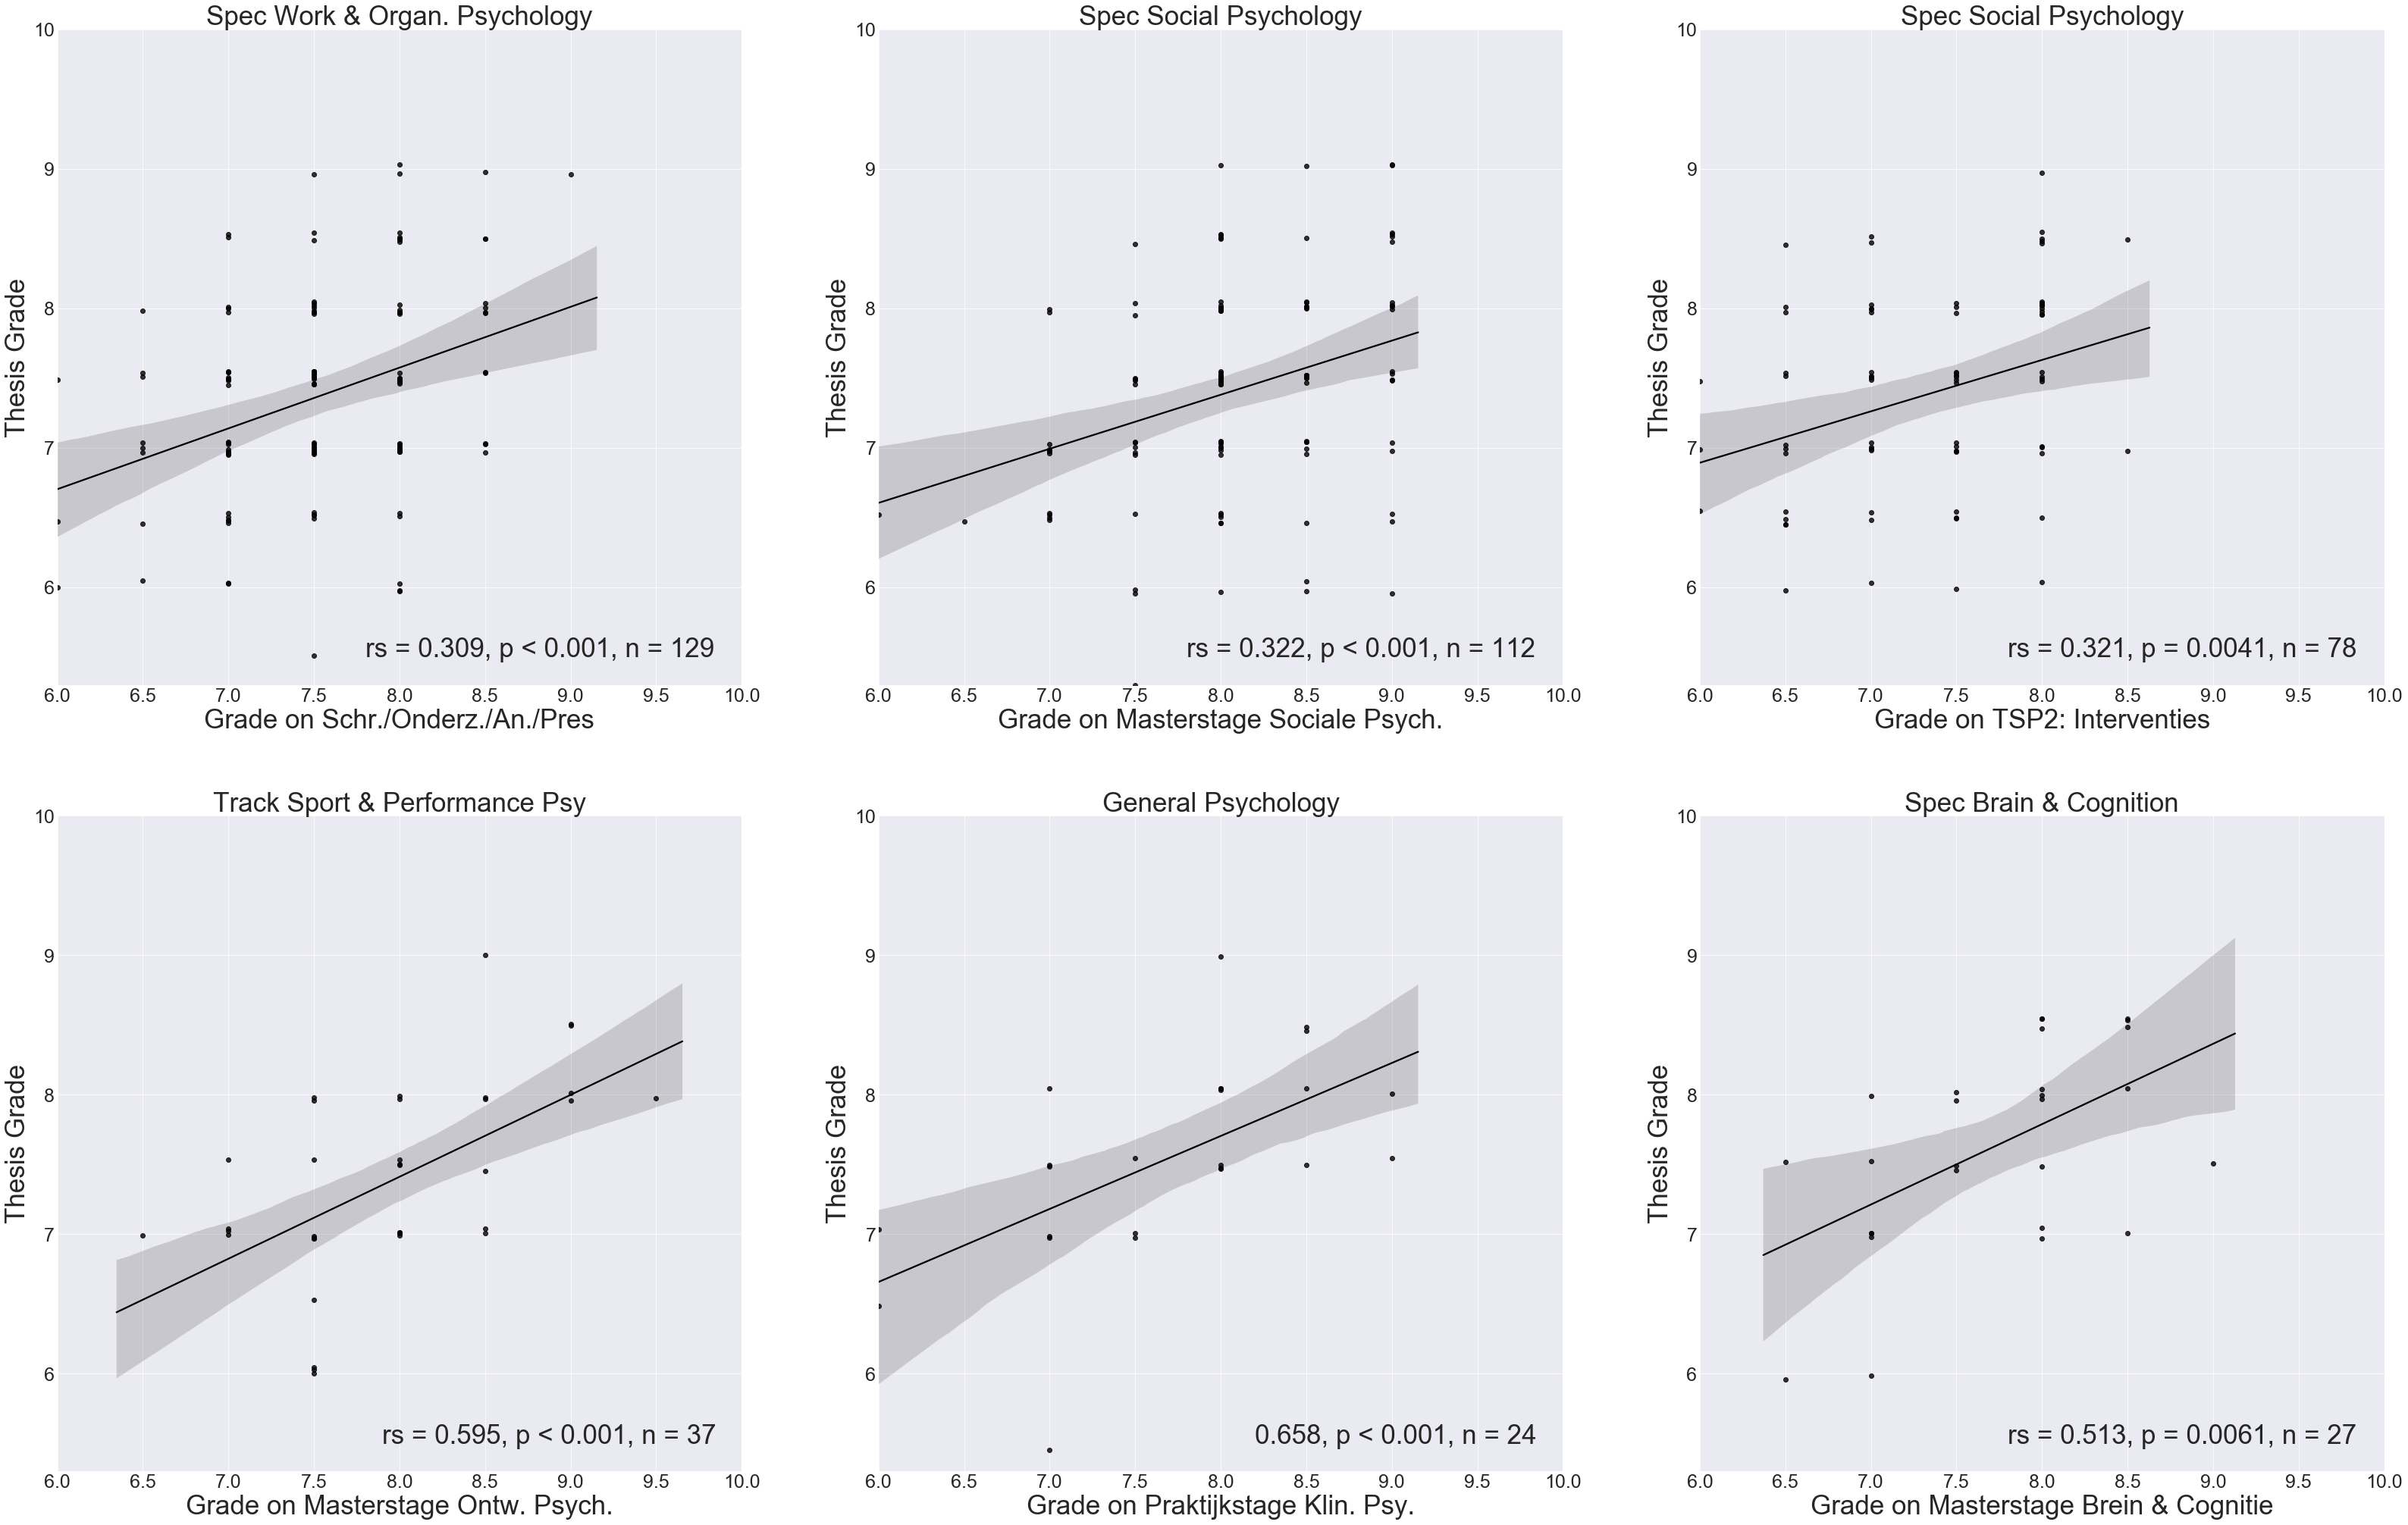

In [152]:
title2 = ['Spec Work & Organ. Psychology', 'Spec Social Psychology','Spec Social Psychology', 'Track Sport & Performance Psy', 
          'General Psychology', 'Spec Brain & Cognition']
text = ['rs = 0.309, p < 0.001, n = 129', 'rs = 0.322, p < 0.001, n = 112', 'rs = 0.321, p = 0.0041, n = 78',
       'rs = 0.595, p < 0.001, n = 37', '0.658, p < 0.001, n = 24', 'rs = 0.513, p = 0.0061, n = 27']

fig = plt.figure(figsize = (55,35))
for i in range(6):
    ax = fig.add_subplot(2,3,i+1)
    sns.regplot(list_df[i][title[i]], list_df[i]['thesis_grades'], color = 'black', y_jitter = 0.05)
    sns.set_style('darkgrid')
    ax.set_title(title2[i], fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xlabel('Grade on ' + all_subjects[i], fontsize = 35)
    plt.ylabel('Thesis Grade', fontsize = 35)
    ax.set_ylim(5.3,10)
    ax.set_xlim(6,10)
    if i == 0:
        ax.text(7.8, 5.5, text[i], fontsize = 35)
    if i == 1:
        ax.text(7.8, 5.5, text[i], fontsize = 35)
    if i == 2:
        ax.text(7.8, 5.5, text[i], fontsize = 35)
    if i == 3:
        ax.text(7.9, 5.5, text[i], fontsize = 35)
    if i == 4:
        ax.text(8.2, 5.5, text[i], fontsize = 35)
    if i == 5:
        ax.text(7.8, 5.5, text[i], fontsize = 35)

## Analysis for Post-2014 Students

In [153]:
post_filtercopy = copy.deepcopy(post_data)
post_groups = post_filtercopy.groupby('Specialisation')

org = post_groups.get_group('Spec Work & Organ. Psychology')
soc = post_groups.get_group('Spec Social Psychology')
sport = post_groups.get_group('Track Sport & Performance Psy')
train = post_groups.get_group('Track Training & Development')

org_subjs = ['Masterstage A&O', 'Conflict en Coöperatie', 'Schr./Onderz./An./Pres', 'Creativiteit in Organisaties',
             'MAPS']
soc_subjs = ['Masterstage Sociale Psych.', 'Emotionele Beïnvloeding', 'Recl.VL&Con', 'Ontwikkelen en Ev. v. Int.',
             'Meting van Attitudes & Gedrag']
sport_subjs = ['Onderz. Sport & Prest.Ps.', 'Talent, Expertise & Creat.','Verdieping Sport/Prest. Psyc', 
               'Interv. Sport & Prest.Psy', 'Masterstage Sport & Prestati']
train_subjs = ['Trainerspracticum', 'Ontwikk. van Trainingen','Masterstage T&D','Literatuuropdracht T&D']

#### Spec Work & Organ. Psychology

In [154]:
org_dfs = []
for each_subj in org_subjs:
    current_df = org[org[each_subj].notnull()]
    org_dfs.append(current_df)

for idx, each_df in enumerate(org_dfs):
    print(org_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[org_subjs[idx]]))

Masterstage A&O
SpearmanrResult(correlation=0.45933278508276054, pvalue=0.00010467111679324166)
Conflict en Coöperatie
SpearmanrResult(correlation=0.368395426469774, pvalue=0.009200746468573466)
Schr./Onderz./An./Pres
SpearmanrResult(correlation=0.3502005402620885, pvalue=0.022990247394462877)
Creativiteit in Organisaties
SpearmanrResult(correlation=0.30190645810297945, pvalue=0.07352963263638004)
MAPS
SpearmanrResult(correlation=0.45680336783999687, pvalue=0.011161485039190617)


Plot 'Masterstage A&O', 'Conflict en Coöperatie', 'Schr./Onderz./An./Pres' & MAPS

#### Spec Social Psychology

In [155]:
soc_dfs = []
for each_subj in soc_subjs:
    current_df = soc[soc[each_subj].notnull()]
    soc_dfs.append(current_df)

for idx, each_df in enumerate(soc_dfs):
    print(soc_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[soc_subjs[idx]]))

Masterstage Sociale Psych.
SpearmanrResult(correlation=0.22696034796391307, pvalue=0.05883380727661191)
Emotionele Beïnvloeding
SpearmanrResult(correlation=0.43915673105762304, pvalue=0.00017933277037017088)
Recl.VL&Con
SpearmanrResult(correlation=0.4161458533610636, pvalue=0.0006933883322128982)
Ontwikkelen en Ev. v. Int.
SpearmanrResult(correlation=0.3252093362744118, pvalue=0.00990554970970085)
Meting van Attitudes & Gedrag
SpearmanrResult(correlation=0.2850587788209176, pvalue=0.03490325863825814)


Plot 'Emotionele Beïnvloeding', 'Recl.VL&Con' & 'Ontwikkelen en Ev. v. Int.'

#### Track Sport & Performance Psy

In [156]:
sport_dfs = []
for each_subj in sport_subjs:
    current_df = sport[sport[each_subj].notnull()]
    sport_dfs.append(current_df)

for idx, each_df in enumerate(sport_dfs):
    print(sport_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[sport_subjs[idx]]))

Onderz. Sport & Prest.Ps.
SpearmanrResult(correlation=0.32894701381059527, pvalue=0.06159593706743637)
Talent, Expertise & Creat.
SpearmanrResult(correlation=0.3279314158653912, pvalue=0.06245107082663388)
Verdieping Sport/Prest. Psyc
SpearmanrResult(correlation=-0.051324769299815165, pvalue=0.7766734089944423)
Interv. Sport & Prest.Psy
SpearmanrResult(correlation=nan, pvalue=nan)
Masterstage Sport & Prestati
SpearmanrResult(correlation=0.1336441896750324, pvalue=0.4735306944076876)


C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\yeachan153\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yeachan153\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Plot 'Onderz. Sport & Prest.Ps.' & 'Talent, Expertise & Creat.'

In [157]:
train_dfs = []
for each_subj in train_subjs:
    current_df = train[train[each_subj].notnull()]
    train_dfs.append(current_df)

for idx, each_df in enumerate(train_dfs):
    print(train_subjs[idx])
    print(stats.spearmanr(each_df['thesis_grades'], each_df[train_subjs[idx]]))

Trainerspracticum
SpearmanrResult(correlation=-0.02724529363286209, pvalue=0.8948925387077533)
Ontwikk. van Trainingen
SpearmanrResult(correlation=0.040180443308307244, pvalue=0.8487658348701425)
Masterstage T&D
SpearmanrResult(correlation=0.04971089546912474, pvalue=0.8217856489457682)
Literatuuropdracht T&D
SpearmanrResult(correlation=0.1385859692461778, pvalue=0.6223200691592868)


## Graphs to plot!

In [158]:
org = post_groups.get_group('Spec Work & Organ. Psychology')
soc = post_groups.get_group('Spec Social Psychology')
sport = post_groups.get_group('Track Sport & Performance Psy')

org_subjs = ['Masterstage A&O','Conflict en Coöperatie','Schr./Onderz./An./Pres','MAPS']
# rs = 0.459, p < 0.001, n = 66; # rs = 0.368, p < 0.001, n = 49; # rs = 0.350, p = 0.0229, n = 42; # rs = 0.456, p = 0.0111, n = 30
soc_subjs = ['Emotionele Beïnvloeding', 'Recl.VL&Con', 'Ontwikkelen en Ev. v. Int.']
# rs = 0.439, p < 0.001, n = 68; # rs = 0.416, p < 0.001, n = 63; # rs = 0.325, p < 0.001, n = 62
sport_subjs = ['Onderz. Sport & Prest.Ps.','Talent, Expertise & Creat.']
# rs = 0.328, p = 0.0615, n = 33; # rs = 0.327, p = 0.0624, n = 33

org_subjs.extend(soc_subjs+sport_subjs)
all_subjects = org_subjs

spec = [org,org,org,org,soc,soc,soc,sport,sport]

list_df = [org[org['Masterstage A&O'].notnull()], org[org['Conflict en Coöperatie'].notnull()],
           org[org['Schr./Onderz./An./Pres'].notnull()], org[org['MAPS'].notnull()],
           soc[soc['Emotionele Beïnvloeding'].notnull()], soc[soc['Recl.VL&Con'].notnull()],
           soc[soc['Ontwikkelen en Ev. v. Int.'].notnull()], sport[sport['Onderz. Sport & Prest.Ps.'].notnull()],
           sport[sport['Talent, Expertise & Creat.'].notnull()]]

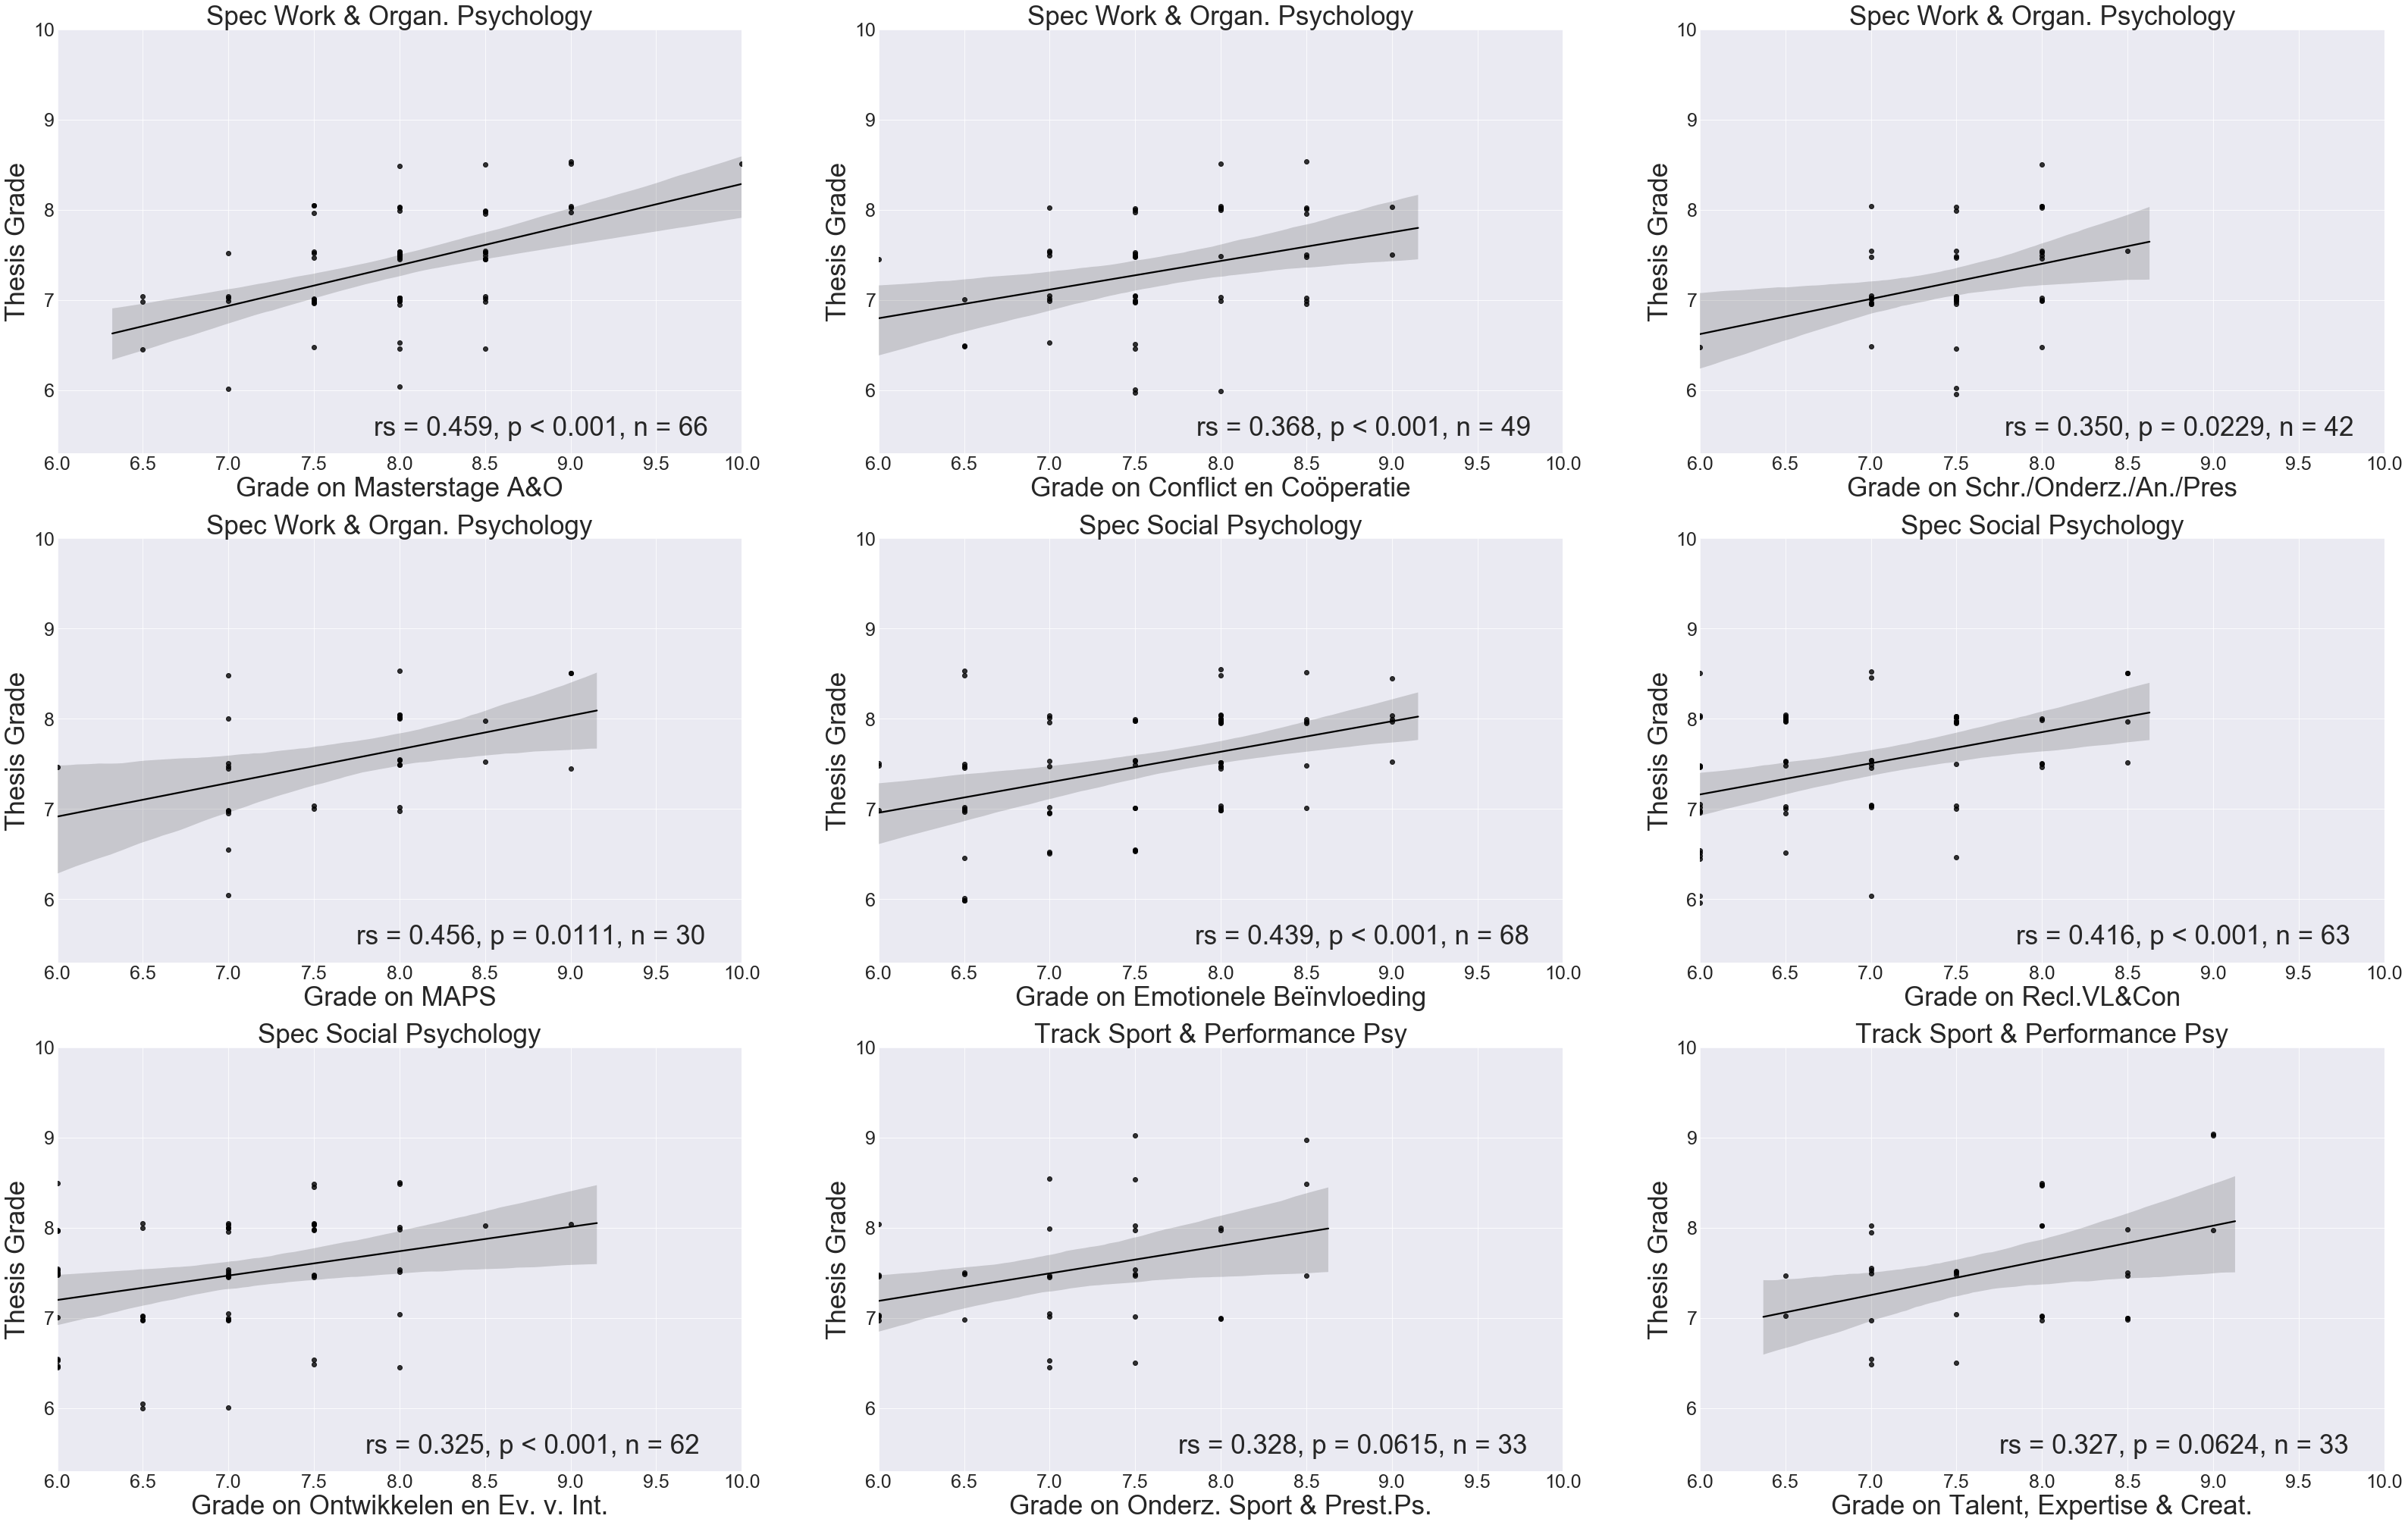

In [168]:
title2 = ['Spec Work & Organ. Psychology', 'Spec Work & Organ. Psychology','Spec Work & Organ. Psychology',
          'Spec Work & Organ. Psychology', 'Spec Social Psychology','Spec Social Psychology',
          'Spec Social Psychology', 'Track Sport & Performance Psy','Track Sport & Performance Psy']

courses = ['Masterstage A&O','Conflict en Coöperatie','Schr./Onderz./An./Pres','MAPS',
          'Emotionele Beïnvloeding', 'Recl.VL&Con', 'Ontwikkelen en Ev. v. Int.',
          'Onderz. Sport & Prest.Ps.','Talent, Expertise & Creat.']

text = ['rs = 0.459, p < 0.001, n = 66', 'rs = 0.368, p < 0.001, n = 49', 'rs = 0.350, p = 0.0229, n = 42',
       'rs = 0.456, p = 0.0111, n = 30', 'rs = 0.439, p < 0.001, n = 68', 'rs = 0.416, p < 0.001, n = 63',
       'rs = 0.325, p < 0.001, n = 62', 'rs = 0.328, p = 0.0615, n = 33', 'rs = 0.327, p = 0.0624, n = 33']

fig = plt.figure(figsize = (55,35))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    sns.regplot(list_df[i][courses[i]], list_df[i]['thesis_grades'], color = 'black', y_jitter = 0.05)
    sns.set_style('darkgrid')
    ax.set_title(title2[i], fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xlabel('Grade on ' + courses[i], fontsize = 35)
    plt.ylabel('Thesis Grade', fontsize = 35)
    ax.set_ylim(5.3,10)
    ax.set_xlim(6,10)
    if i == 0:
        ax.text(7.85, 5.5, text[i], fontsize = 35)
    if i == 1:
        ax.text(7.86, 5.5, text[i], fontsize = 35)
    if i == 2:
        ax.text(7.78, 5.5, text[i], fontsize = 35)
    if i == 3:
        ax.text(7.75, 5.5, text[i], fontsize = 35)
    if i == 4:
        ax.text(7.85, 5.5, text[i], fontsize = 35)
    if i == 5:
        ax.text(7.85, 5.5, text[i], fontsize = 35)
    if i == 6:
        ax.text(7.8, 5.5, text[i], fontsize = 35)
    if i == 7:
        ax.text(7.75, 5.5, text[i], fontsize = 35)
    if i == 8:
        ax.text(7.75, 5.5, text[i], fontsize = 35)